# Gradinet Descent

       . batch_ GradientDescent
       . Stochastic GradientDescent
       . mini-batch GradientDescent

    

In [28]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
X,y= load_diabetes(return_X_y=True)

* Train test Split

In [3]:
X_train,X_test,y_train,y_test = tts(X,y,train_size=0.8,random_state=1)

* Linear regression model

In [4]:
reg=LinearRegression().fit(X_train,y_train)
print("coefficients :",reg.coef_ ,'\n')
print("intercept :" , reg.intercept_ ,'\n')
print("r2_score" , r2_score(y_test,reg.predict(X_test)),"\n")
print("MSE : ",mean_squared_error(y_test, reg.predict(X_test)))

coefficients : [ -30.62168241 -272.25451707  528.84444333  327.70269026 -581.01413007
  332.96286278  -27.97606192  139.28448979  665.07521004   61.90596378] 

intercept : 151.43006895898006 

r2_score 0.43843604017332694 

MSE :  2992.5576814529445


#  Batch Gradient descent
        . create class for BGD

In [5]:
class BGD_Regressor :
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    def fit(model,X_train,y_train) :
        # initializing coefs & intercepts
        model.intercept_ = 0
        model.coef_ = np.ones(X_train.shape[1])

        for i in range(model.epochs) :
            # updating inercepts & coefs
            y_pred = np.dot(X_train,model.coef_) + model.intercept_
            intercept_der = -2 * np.mean(y_train - y_pred)
            model.intercept_ = model.intercept_ - (model.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train -y_pred),X_train)/X_train.shape[0] 
            model.coef_ = model.coef_ - (model.lr * coef_der)
        


    def predict(model,X_test) :
        return np.dot(X_test, model.coef_) + model.intercept_
    

In [22]:
bgd_model=BGD_Regressor(epochs=10000,learning_rate=0.51)
bgd_model.fit(X_train,y_train)
print("coeffiecints: ",bgd_model.coef_,'\n')
print("intercept :",bgd_model.intercept_,"\n")
print("R^2:",r2_score(y_test, bgd_model.predict(X_test)),'\n')
print("MSE : ",mean_squared_error(y_test, bgd_model.predict(X_test)))

coeffiecints:  [ -30.93716469 -269.90618794  534.48322397  324.96944774 -129.41307558
  -25.79545976 -226.91153041   88.44304882  493.82273377   63.84592733] 

intercept : 151.3634254492439 

R^2: 0.4297224776516856 

MSE :  3038.991997617049


# Stochastic Gradient Descent

In [7]:
class SGD_Regressor:
    
    def __init__(model,lr=0.01,epochs=100):
        
        model.coef_ = None
        model.intercept_ = None
        model.lr = lr
        model.epochs = epochs
        
    def fit(model,X_train,y_train):
        # init your coefs
        model.intercept_ = 0
        model.coef_ = np.ones(X_train.shape[1])
        
        for i in range(model.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],model.coef_) + model.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                model.intercept_ = model.intercept_ - (model.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                model.coef_ = model.coef_ - (model.lr * coef_der)
    
    def predict(model,X_test):
        return np.dot(X_test,model.coef_) + model.intercept_

In [17]:
sgd_model=SGD_Regressor(lr=0.01,epochs=1000)
sgd_model.fit(X_train,y_train)
print("coefficients: ",sgd_model.coef_,'\n')
print("intercept:",sgd_model.intercept_,'\n')
print("R^2:",r2_score(y_test, sgd_model.predict(X_test)),'\n')
print("MSE : ",mean_squared_error(y_test, sgd_model.predict(X_test)))

coefficients:  [ -30.46956923 -273.74330143  533.36700183  330.65370605  -96.29524219
  -52.57573443 -236.11676459   88.63994398  479.98110897   58.30689446] 

intercept: 154.75048577561466 

R^2: 0.43155802776913044 

MSE :  3029.2104054982337


# mini-batch Gradient Descent

In [11]:
import random
class MBGD_Regressor:
    
    def __init__(model,batch_size,lr=0.01,epochs=100):
        
        model.coef_ = None
        model.intercept_ = None
        model.lr = lr
        model.epochs = epochs
        model.batch_size = batch_size
        
    def fit(model,X_train,y_train):
        # init your coefs
        model.intercept_ = 0
        model.coef_ = np.ones(X_train.shape[1])
        
        for i in range(model.epochs):
            
            for j in range(int(X_train.shape[0]/model.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),model.batch_size)
                
                y_hat = np.dot(X_train[idx],model.coef_) + model.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                model.intercept_ = model.intercept_ - (model.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                model.coef_ =model.coef_ - (model.lr * coef_der)
        

    
    def predict(model,X_test):
        return np.dot(X_test,model.coef_) + model.intercept_

In [18]:
mbr_model = MBGD_Regressor(batch_size=int(X_train.shape[0]/10),lr=0.5,epochs=1000)
mbr_model.fit(X_train,y_train)
print("coefficients: ",mbr_model.coef_,'\n')
print("intercept:",mbr_model.intercept_,'\n')
print("R^2:",r2_score(y_test, mbr_model.predict(X_test)),'\n')
print("MSE : ",mean_squared_error(y_test, mbr_model.predict(X_test)))

coefficients:  [-2.85186305e+00 -2.80375713e+02  5.13867034e+02  3.90553169e+02
 -5.99460423e+02  3.06797250e+02 -4.00716375e-01  1.19183071e+02
  6.72699807e+02  2.21316385e+01] 

intercept: 145.1609812146848 

R^2: 0.4266864933245783 

MSE :  3055.1706680247084


In [78]:
y_pred_sgd = sgd_model.predict(X_train)
y_pred_mbr = mbr_model.predict(X_train)
y_pred_reg = reg.predict(X_train)
y_pred_bgd = bgd_model.predict(X_train)

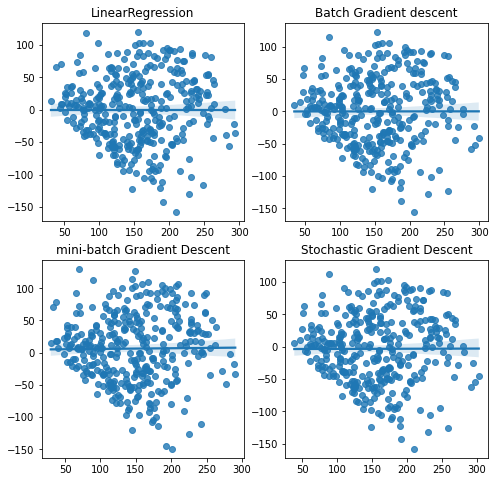

In [86]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.regplot(y_pred_reg,(y_train - y_pred_reg),ax=axes[0,0])
sns.regplot(y_pred_bgd,(y_train - y_pred_bgd),ax=axes[0,1])
sns.regplot(y_pred_mbr,(y_train - y_pred_mbr),ax=axes[1,0])
sns.regplot(y_pred_sgd,(y_train - y_pred_sgd),ax=axes[1,1])
ax=axes[0,0].set_title("LinearRegression")
ax=axes[0,1].set_title("Batch Gradient descent")
ax=axes[1,0].set_title("mini-batch Gradient Descent")
ax=axes[1,1].set_title("Stochastic Gradient Descent")
